In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import os
import pandas as pd
import datetime
sns.set_style("whitegrid")
from matplotlib.ticker import NullFormatter
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import MonthLocator

# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 12,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 468    # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width*ratio  # height in inches
fig_size = [fig_width, fig_height]
rcParams.update({'figure.figsize': fig_size})

In [19]:
ISO3166 = {
	'AD': 'Andorra',
	'AE': 'United Arab Emirates',
	'AF': 'Afghanistan',
	'AG': 'Antigua & Barbuda',
	'AI': 'Anguilla',
	'AL': 'Albania',
	'AM': 'Armenia',
	'AN': 'Netherlands Antilles',
	'AO': 'Angola',
	'AQ': 'Antarctica',
	'AR': 'Argentina',
	'AS': 'American Samoa',
	'AT': 'Austria',
	'AU': 'Australia',
	'AW': 'Aruba',
	'AZ': 'Azerbaijan',
	'BA': 'Bosnia and Herzegovina',
	'BB': 'Barbados',
	'BD': 'Bangladesh',
	'BE': 'Belgium',
	'BF': 'Burkina Faso',
	'BG': 'Bulgaria',
	'BH': 'Bahrain',
	'BI': 'Burundi',
	'BJ': 'Benin',
	'BM': 'Bermuda',
	'BN': 'Brunei Darussalam',
	'BO': 'Bolivia',
	'BR': 'Brazil',
	'BS': 'Bahama',
	'BT': 'Bhutan',
	'BU': 'Burma (no longer exists)',
	'BV': 'Bouvet Island',
	'BW': 'Botswana',
	'BY': 'Belarus',
	'BZ': 'Belize',
	'CA': 'Canada',
	'CC': 'Cocos (Keeling) Islands',
	'CF': 'Central African Republic',
	'CG': 'Congo',
	'CH': 'Switzerland',
	'CI': 'Côte D\'ivoire (Ivory Coast)',
	'CK': 'Cook Iislands',
	'CL': 'Chile',
	'CM': 'Cameroon',
	'CN': 'China',
	'CO': 'Colombia',
	'CR': 'Costa Rica',
	'CS': 'Czechoslovakia (no longer exists)',
	'CU': 'Cuba',
	'CV': 'Cape Verde',
	'CX': 'Christmas Island',
	'CY': 'Cyprus',
	'CZ': 'Czech Republic',
	'DD': 'German Democratic Republic (no longer exists)',
	'DE': 'Germany',
	'DJ': 'Djibouti',
	'DK': 'Denmark',
	'DM': 'Dominica',
	'DO': 'Dominican Republic',
	'DZ': 'Algeria',
	'EC': 'Ecuador',
	'EE': 'Estonia',
	'EG': 'Egypt',
	'EH': 'Western Sahara',
	'ER': 'Eritrea',
	'ES': 'Spain',
	'ET': 'Ethiopia',
	'FI': 'Finland',
	'FJ': 'Fiji',
	'FK': 'Falkland Islands (Malvinas)',
	'FM': 'Micronesia',
	'FO': 'Faroe Islands',
	'FR': 'France',
	'FX': 'France, Metropolitan',
	'GA': 'Gabon',
	'GB': 'United Kingdom',
	'GD': 'Grenada',
	'GE': 'Georgia',
	'GF': 'French Guiana',
	'GH': 'Ghana',
	'GI': 'Gibraltar',
	'GL': 'Greenland',
	'GM': 'Gambia',
	'GN': 'Guinea',
	'GP': 'Guadeloupe',
	'GQ': 'Equatorial Guinea',
	'GR': 'Greece',
	'GS': 'South Georgia and the South Sandwich Islands',
	'GT': 'Guatemala',
	'GU': 'Guam',
	'GW': 'Guinea-Bissau',
	'GY': 'Guyana',
	'HK': 'Hong Kong',
	'HM': 'Heard & McDonald Islands',
	'HN': 'Honduras',
	'HR': 'Croatia',
	'HT': 'Haiti',
	'HU': 'Hungary',
	'ID': 'Indonesia',
	'IE': 'Ireland',
	'IL': 'Israel',
	'IN': 'India',
	'IO': 'British Indian Ocean Territory',
	'IQ': 'Iraq',
	'IR': 'Islamic Republic of Iran',
	'IS': 'Iceland',
	'IT': 'Italy',
	'JM': 'Jamaica',
	'JO': 'Jordan',
	'JP': 'Japan',
	'KE': 'Kenya',
	'KG': 'Kyrgyzstan',
	'KH': 'Cambodia',
	'KI': 'Kiribati',
	'KM': 'Comoros',
	'KN': 'St. Kitts and Nevis',
	'KP': 'Korea, Democratic People\'s Republic of',
	'KR': 'Korea, Republic of',
	'KW': 'Kuwait',
	'KY': 'Cayman Islands',
	'KZ': 'Kazakhstan',
	'LA': 'Lao People\'s Democratic Republic',
	'LB': 'Lebanon',
	'LC': 'Saint Lucia',
	'LI': 'Liechtenstein',
	'LK': 'Sri Lanka',
	'LR': 'Liberia',
	'LS': 'Lesotho',
	'LT': 'Lithuania',
	'LU': 'Luxembourg',
	'LV': 'Latvia',
	'LY': 'Libyan Arab Jamahiriya',
	'MA': 'Morocco',
	'MC': 'Monaco',
	'MD': 'Moldova, Republic of',
	'MG': 'Madagascar',
	'MH': 'Marshall Islands',
	'ML': 'Mali',
	'MN': 'Mongolia',
	'MM': 'Myanmar',
	'MO': 'Macau',
	'MP': 'Northern Mariana Islands',
	'MQ': 'Martinique',
	'MR': 'Mauritania',
	'MS': 'Monserrat',
	'MT': 'Malta',
	'MU': 'Mauritius',
	'MV': 'Maldives',
	'MW': 'Malawi',
	'MX': 'Mexico',
	'MY': 'Malaysia',
	'MZ': 'Mozambique',
	'NA': 'Namibia',
	'NC': 'New Caledonia',
	'NE': 'Niger',
	'NF': 'Norfolk Island',
	'NG': 'Nigeria',
	'NI': 'Nicaragua',
	'NL': 'Netherlands',
	'NO': 'Norway',
	'NP': 'Nepal',
	'NR': 'Nauru',
	'NT': 'Neutral Zone (no longer exists)',
	'NU': 'Niue',
	'NZ': 'New Zealand',
	'OM': 'Oman',
	'PA': 'Panama',
	'PE': 'Peru',
	'PF': 'French Polynesia',
	'PG': 'Papua New Guinea',
	'PH': 'Philippines',
	'PK': 'Pakistan',
	'PL': 'Poland',
	'PM': 'St. Pierre & Miquelon',
	'PN': 'Pitcairn',
	'PR': 'Puerto Rico',
	'PT': 'Portugal',
	'PW': 'Palau',
	'PY': 'Paraguay',
	'QA': 'Qatar',
	'RE': 'Réunion',
	'RO': 'Romania',
	'RU': 'Russian Federation',
	'RW': 'Rwanda',
	'SA': 'Saudi Arabia',
	'SB': 'Solomon Islands',
	'SC': 'Seychelles',
	'SD': 'Sudan',
	'SE': 'Sweden',
	'SG': 'Singapore',
	'SH': 'St. Helena',
	'SI': 'Slovenia',
	'SJ': 'Svalbard & Jan Mayen Islands',
	'SK': 'Slovakia',
	'SL': 'Sierra Leone',
	'SM': 'San Marino',
	'SN': 'Senegal',
	'SO': 'Somalia',
	'SR': 'Suriname',
	'ST': 'Sao Tome & Principe',
	'SU': 'Union of Soviet Socialist Republics (no longer exists)',
	'SV': 'El Salvador',
	'SY': 'Syrian Arab Republic',
	'SZ': 'Swaziland',
	'TC': 'Turks & Caicos Islands',
	'TD': 'Chad',
	'TF': 'French Southern Territories',
	'TG': 'Togo',
	'TH': 'Thailand',
	'TJ': 'Tajikistan',
	'TK': 'Tokelau',
	'TM': 'Turkmenistan',
	'TN': 'Tunisia',
	'TO': 'Tonga',
	'TP': 'East Timor',
	'TR': 'Turkey',
	'TT': 'Trinidad & Tobago',
	'TV': 'Tuvalu',
	'TW': 'Taiwan, Province of China',
	'TZ': 'Tanzania, United Republic of',
	'UA': 'Ukraine',
	'UG': 'Uganda',
	'UM': 'United States Minor Outlying Islands',
	'US': 'United States of America',
	'UY': 'Uruguay',
	'UZ': 'Uzbekistan',
	'VA': 'Vatican City State (Holy See)',
	'VC': 'St. Vincent & the Grenadines',
	'VE': 'Venezuela',
	'VG': 'British Virgin Islands',
	'VI': 'United States Virgin Islands',
	'VN': 'Viet Nam',
	'VU': 'Vanuatu',
	'WF': 'Wallis & Futuna Islands',
	'WS': 'Samoa',
	'YD': 'Democratic Yemen (no longer exists)',
	'YE': 'Yemen',
	'YT': 'Mayotte',
	'YU': 'Yugoslavia',
	'ZA': 'South Africa',
	'ZM': 'Zambia',
	'ZR': 'Zaire',
	'ZW': 'Zimbabwe',
	'ZZ': 'Unknown or unspecified country'}

In [20]:
def extract_forecasts(data, forecast_period):
    
    dates = []
    forecast_dates = []
    data_quantile_0025_cont = []
    data_quantile_0975_cont = []
    data_point_cont = []
    
    for file in sorted(os.listdir(ensemble_forecast_directory))[7:]:    

        if file[-4:] == '.csv':
            
            data = pd.read_csv(ensemble_forecast_directory+file)
                            
            data_quantile = data[data['type'] == 'quantile']
                        
            data_quantile_0025 = data[data['quantile'] == 0.025]    
            data_quantile_0975 = data[data['quantile'] == 0.975]     
            
            data_point = data[data['type'] == 'point']
                        
            forecast_dates.append(data_quantile_0025[data_quantile_0025['target'] == forecast_period]['forecast_date'].to_numpy()[0])
            dates.append(data_quantile_0025[data_quantile_0025['target'] == forecast_period]['target_end_date'].to_numpy()[0])
            data_quantile_0025_cont.append(sum(data_quantile_0025[data_quantile_0025['target'] == forecast_period]['value']))
            data_quantile_0975_cont.append(sum(data_quantile_0975[data_quantile_0975['target'] == forecast_period]['value']))
            data_point_cont.append(sum(data_point[data_point['target'] == forecast_period]['value']))
    
    dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
    forecast_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in forecast_dates]
    
    return np.asarray(forecast_dates), np.asarray(dates), np.asarray(data_quantile_0025_cont), np.asarray(data_quantile_0975_cont), np.asarray(data_point_cont), np.asarray([x for x in set(data_quantile['location'].to_numpy())])

In [21]:
def error_comparison(deaths_covid_data, data_point, forecast_dates, dates, dates_covid_data, week):
    error_euler = []
    error_ensemble = []
    
    rate_of_change = []
    euler_prediction_arr = []
    rate_of_change_dates = []
    euler_prediction_dates = []

    for i in range(len(dates)):
        
        ind = np.where(dates_covid_data == dates[i])
            
        if len(ind[0]):
            ind = ind[0][0]
            
            current_rate_of_change = deaths_covid_data[ind]-deaths_covid_data[ind-6]

            ind2 = np.where(dates_covid_data == forecast_dates[i])[0][0]
            euler_prediction = deaths_covid_data[ind2-2]-deaths_covid_data[ind2-2-6]
            print(euler_prediction, dates_covid_data[ind2-2], dates_covid_data[ind2-2-6], dates_covid_data[ind], dates_covid_data[ind-6])
            
            euler_prediction_arr.append(euler_prediction)
            rate_of_change.append(current_rate_of_change)
            rate_of_change_dates.append(forecast_dates[i])
            euler_prediction_dates.append(dates[i])

            error_euler.append(abs(euler_prediction-current_rate_of_change))
            error_ensemble.append(abs(data_point[i]-current_rate_of_change))
      
    error_euler = np.asarray(error_euler)/div  
    error_ensemble = np.asarray(error_ensemble)/div    
    error_euler_cum = np.cumsum(error_euler)
    error_ensemble_cum = np.cumsum(error_ensemble)
    
    rate_of_change = np.array(rate_of_change)
    rate_of_change_dates = np.array(rate_of_change_dates)
    euler_prediction_arr = np.array(euler_prediction_arr)
    euler_prediction_dates = np.array(euler_prediction_dates)

    return rate_of_change, rate_of_change_dates, euler_prediction_arr, euler_prediction_dates, error_euler, error_ensemble, error_euler_cum, error_ensemble_cum

In [22]:
ensemble_forecast_directory = '../../data/Europe_ensemble_forecasts/fetched_Jan_2022/EuroCOVIDhub-ensemble/'
    
forecast_dates_1wk, dates_1wk, data_quantile_0025_1wk, data_quantile_0975_1wk, data_point_1wk, countries = \
extract_forecasts(ensemble_forecast_directory, '1 wk ahead inc death')

forecast_dates_4wk, dates_4wk, data_quantile_0025_4wk, data_quantile_0975_4wk, data_point_4wk, countries = \
extract_forecasts(ensemble_forecast_directory, '4 wk ahead inc death')

div = 1e3

In [23]:
countries_no_abbr = np.asarray([ISO3166[x] for x in countries])

covid_data = pd.read_csv('../../data/Covid19_ground_truth_reports/fetched_Jan_2022/time_series_covid19_deaths_global.csv')

covid_data = covid_data[covid_data["Country/Region"].isin(countries_no_abbr)]

colnames = covid_data.columns.tolist()

start = datetime.datetime.strptime(colnames[12], "%m/%d/%y")
end = datetime.datetime.strptime(colnames[-1], "%m/%d/%y")
dates_covid_data = np.asarray([start + datetime.timedelta(days=x) for x in range(0,(end-start).days+1)])
deaths_covid_data = [covid_data.iloc[:,i].sum() for i in range(12,len(colnames))]
deaths_covid_data = np.array(deaths_covid_data)

In [24]:
rate_of_change_1wk, rate_of_change_dates_1wk, euler_prediction_arr_1wk, euler_prediction_dates_1wk, error_euler_1wk, error_ensemble_1wk, error_euler_1wk_cum, error_ensemble_1wk_cum = \
error_comparison(deaths_covid_data, data_point_1wk, forecast_dates_1wk, dates_1wk, dates_covid_data, 1)
rate_of_change_4wk, rate_of_change_dates_4wk, euler_prediction_arr_4wk, euler_prediction_dates_4wk, error_euler_4wk, error_ensemble_4wk, error_euler_4wk_cum, error_ensemble_4wk_cum = \
error_comparison(deaths_covid_data, data_point_4wk, forecast_dates_4wk, dates_4wk, dates_covid_data, 4)

14701 2021-04-24 00:00:00 2021-04-18 00:00:00 2021-05-01 00:00:00 2021-04-25 00:00:00
12804 2021-05-01 00:00:00 2021-04-25 00:00:00 2021-05-08 00:00:00 2021-05-02 00:00:00
10572 2021-05-08 00:00:00 2021-05-02 00:00:00 2021-05-15 00:00:00 2021-05-09 00:00:00
8619 2021-05-15 00:00:00 2021-05-09 00:00:00 2021-05-22 00:00:00 2021-05-16 00:00:00
6710 2021-05-22 00:00:00 2021-05-16 00:00:00 2021-05-29 00:00:00 2021-05-23 00:00:00
5153 2021-05-29 00:00:00 2021-05-23 00:00:00 2021-06-05 00:00:00 2021-05-30 00:00:00
3978 2021-06-05 00:00:00 2021-05-30 00:00:00 2021-06-12 00:00:00 2021-06-06 00:00:00
3800 2021-06-12 00:00:00 2021-06-06 00:00:00 2021-06-19 00:00:00 2021-06-13 00:00:00
2617 2021-06-19 00:00:00 2021-06-13 00:00:00 2021-06-26 00:00:00 2021-06-20 00:00:00
2386 2021-06-26 00:00:00 2021-06-20 00:00:00 2021-07-03 00:00:00 2021-06-27 00:00:00
1938 2021-07-03 00:00:00 2021-06-27 00:00:00 2021-07-10 00:00:00 2021-07-04 00:00:00
1374 2021-07-10 00:00:00 2021-07-04 00:00:00 2021-07-17 00:00:

In [25]:
euler_lagrange_1wk_data = pd.read_csv("../../results/fetched_Jan_2022/EU/fetched_Jan_2022_error_euler_langrange_cdc_week_1.csv")
euler_lagrange_4wk_data = pd.read_csv("../../results/fetched_Jan_2022/EU/fetched_Jan_2022_error_euler_langrange_cdc_week_4.csv")
                                      
euler_lagrange_1wk_dates = pd.to_datetime(euler_lagrange_1wk_data["target_prediction_date"]).to_numpy()
euler_lagrange_1wk_prediction = euler_lagrange_1wk_data["euler_prediction_value"].to_numpy()
euler_lagrange_1wk_error = euler_lagrange_1wk_data["error_euler"].to_numpy()
euler_lagrange_4wk_dates = pd.to_datetime(euler_lagrange_4wk_data["target_prediction_date"]).to_numpy()
euler_lagrange_4wk_prediction = euler_lagrange_4wk_data["euler_prediction_value"].to_numpy()
euler_lagrange_4wk_error = euler_lagrange_4wk_data["error_euler"].to_numpy()

In [31]:
euler_lagrange_1wk_data

,Unnamed: 0,error_euler,error_eu_ensemble,cum_error_euler,cum_error_eu_ensemble,target_prediction_date,prediction_made_date,euler_prediction_value,eu_prediction_value,ground_truth_incidence
0,0,1965.304664,2104.0,1965.304664,2104.0,2021-05-01,2021-04-26,14769.304664,14908,12804
1,1,2047.520087,1728.0,4012.824750,3832.0,2021-05-08,2021-05-03,12619.520087,12300,10572
2,2,1966.487406,1587.0,5979.312156,5419.0,2021-05-15,2021-05-10,10585.487406,10206,8619
3,3,1657.987140,1213.0,7637.299296,6632.0,2021-05-22,2021-05-17,8367.987140,7923,6710
4,4,1461.368102,675.0,9098.667398,7307.0,2021-05-29,2021-05-24,6614.368102,5828,5153
5,5,1067.482552,355.0,10166.149950,7662.0,2021-06-05,2021-05-31,5045.482552,4333,3978
6,6,137.092108,406.0,10303.242057,8068.0,2021-06-12,2021-06-07,3937.092108,3394,3800
7,7,1153.103480,396.0,11456.345537,8464.0,2021-06-19,2021-06-14,3770.103480,3013,2617
8,8,166.731311,178.0,11623.076848,8642.0,2021-06-26,2021-06-21,2552.731311,2208,2386
9,9,503.415292,29.0,12126.492139,8671.0,2021-07-03,2021-06-28,2441.415292,1967,1938


In [26]:
rolling_mean_1wk_euler_lagrange = euler_lagrange_1wk_data.rolling(window=4)['error_euler'].mean()
rolling_mean_4wk_euler_lagrange = euler_lagrange_4wk_data.rolling(window=4)['error_euler'].mean()

df = pd.DataFrame()
df["error_ensemble"] = error_ensemble_1wk
rolling_mean_1wk_CDC = df.rolling(window=4)['error_ensemble'].mean()
df = pd.DataFrame()
df["error_ensemble"] = error_ensemble_4wk
rolling_mean_4wk_CDC = df.rolling(window=4)['error_ensemble'].mean()

df = pd.DataFrame()
df["error_ensemble"] = error_euler_1wk
rolling_mean_1wk_euler = df.rolling(window=4)['error_ensemble'].mean()
df = pd.DataFrame()
df["error_ensemble"] = error_euler_4wk
rolling_mean_4wk_euler = df.rolling(window=4)['error_ensemble'].mean()

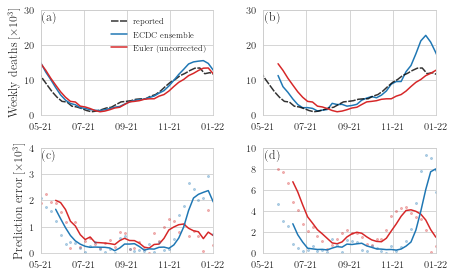

In [27]:
fig, ax = plt.subplots(nrows=2,ncols=2)
ax[0,0].text(dates_1wk[0]+datetime.timedelta(days=2), 0.9*30, r'(a)')
ax[0,0].plot(rate_of_change_dates_1wk, rate_of_change_1wk/div, ls = (0, (5, 1)), color = 'k', linewidth = 1.5, alpha = 0.8, label = r'reported')
#ax[0,0].fill_between(dates_1wk, data_quantile_0975_1wk/div, data_quantile_0025_1wk/div, facecolor = 'tab:blue', alpha = 0.3)
ax[0,0].plot(dates_1wk, data_point_1wk/div, color = 'tab:blue', linewidth = 1.5, label=r"ECDC ensemble")
ax[0,0].plot(euler_prediction_dates_1wk, euler_prediction_arr_1wk/div, color = "tab:red", label=r"Euler (uncorrected)")
ax[0,0].set_xlim([datetime.date(2021, 5, 1), datetime.date(2022, 1, 1)])
ax[0,0].tick_params(axis='x', labelrotation=0)
ax[0,0].set_ylabel(r'Weekly deaths [$\times 10^3$]')
ax[0,0].xaxis.set_major_locator(MonthLocator([1,3,5,7,9,11]))
ax[0,0].xaxis.set_major_formatter(DateFormatter("%m-%y"))
ax[0,0].set_ylim(0,30)
ax[0,0].legend(loc=1,frameon=False,fontsize=8)

ax[0,1].text(dates_1wk[0]+datetime.timedelta(days=2), 0.9*30, r'(b)')
#ax[0,1].fill_between(dates_4wk, data_quantile_0975_4wk/div, data_quantile_0025_4wk/div, facecolor = 'tab:blue', alpha = 0.3)
ax[0,1].plot(dates_4wk, data_point_4wk/div, color = 'tab:blue', linewidth = 1.5)
ax[0,1].plot(rate_of_change_dates_1wk, rate_of_change_1wk/div, ls = (0, (5, 1)), color = 'k', linewidth = 1.5, alpha = 0.8)
ax[0,1].plot(euler_prediction_dates_4wk, euler_prediction_arr_4wk/div, color = "tab:red")
ax[0,1].set_xlim([datetime.date(2021, 5, 1), datetime.date(2022, 1, 1)])
ax[0,1].xaxis.set_major_locator(MonthLocator([1,3,5,7,9,11]))
ax[0,1].xaxis.set_major_formatter(DateFormatter("%m-%y"))
ax[0,1].set_ylim(0,30)

ax[1,0].text(dates_1wk[0]+datetime.timedelta(days=2), 0.9*4, r'(c)')
ax[1,0].plot(euler_prediction_dates_1wk,error_euler_1wk, color = 'tab:red', linewidth = 1.5, ls = "None", marker=".", markersize=4, alpha=0.3)   
ax[1,0].plot(euler_prediction_dates_1wk,rolling_mean_1wk_euler, color = 'tab:red', linewidth = 1.5)   
#ax[1,0].plot(rate_of_change_dates_1wk,error_euler_1wk_cum, color = 'tab:red', ls = (0, (5, 1)), linewidth = 1.5) 
ax[1,0].plot(euler_prediction_dates_1wk,error_ensemble_1wk, color = 'tab:blue', linewidth = 1.5, ls = "None", marker=".", markersize=4, alpha=0.3)  
ax[1,0].plot(euler_prediction_dates_1wk,rolling_mean_1wk_CDC, color = 'tab:blue', linewidth = 1.5)  
#ax[1,0].plot(rate_of_change_dates_1wk,error_ensemble_1wk_cum, color = 'tab:blue', ls = (0, (5, 1)), linewidth = 1.5)  
ax[1,0].set_xlim([datetime.date(2021, 5, 1), datetime.date(2022, 1, 1)])
ax[1,0].tick_params(axis='x', labelrotation=0)
ax[1,0].xaxis.set_major_locator(MonthLocator([1,3,5,7,9,11]))
ax[1,0].xaxis.set_major_formatter(DateFormatter("%m-%y"))
ax[1,0].set_ylabel(r'Prediction error [$\times 10^3$]')
ax[1,0].set_ylim(0,4)

ax[1,1].text(dates_1wk[0]+datetime.timedelta(days=2), 0.9*10, r'(d)')
ax[1,1].plot(euler_prediction_dates_4wk,error_euler_4wk, color = 'tab:red', linewidth = 1.5, ls = "None", marker=".", markersize=4, alpha=0.3)  
ax[1,1].plot(euler_prediction_dates_4wk,rolling_mean_4wk_euler, color = 'tab:red', linewidth = 1.5)  
#ax[1,1].plot(rate_of_change_dates_4wk,error_euler_4wk_cum, color = 'tab:red', ls = (0, (5, 1)), linewidth = 1.5) 
ax[1,1].plot(euler_prediction_dates_4wk,error_ensemble_4wk, color = 'tab:blue', linewidth = 1.5, ls = "None", marker=".", markersize=4, alpha=0.3)  
ax[1,1].plot(euler_prediction_dates_4wk,rolling_mean_4wk_CDC, color = 'tab:blue', linewidth = 1.5)  
#ax[1,1].plot(rate_of_change_dates_4wk,error_ensemble_4wk_cum, color = 'tab:blue', ls = (0, (5, 1)), linewidth = 1.5)  
ax[1,1].set_xlim([datetime.date(2021, 5, 1), datetime.date(2022, 1, 1)])
ax[1,1].tick_params(axis='x', labelrotation=0)
ax[1,1].xaxis.set_major_locator(MonthLocator([1,3,5,7,9,11]))
ax[1,1].xaxis.set_major_formatter(DateFormatter("%m-%y"))
ax[1,1].set_ylim(0,10)

plt.tight_layout()
plt.margins(0,0)
plt.savefig("euler_ecdc_comparison_fetched_Jan_2022_EU.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0.05)
plt.show()

In [28]:
print("Euler--Lagrange cumulative error 1wk:", sum(error_euler_1wk))
print("ECDC error 1wk:", sum(error_ensemble_1wk))
print("Euler--Lagrange cumulative error 4wk:", sum(error_euler_4wk))
print("ECDC error 4wk:", sum(error_ensemble_4wk))

Euler--Lagrange cumulative error 1wk: 30.352999999999998
ECDC error 1wk: 30.942
Euler--Lagrange cumulative error 4wk: 90.55199999999999
ECDC error 4wk: 65.63000000000001


In [29]:
sum(error_euler_1wk < error_ensemble_1wk)/len(euler_arr)

0.3684210526315789

In [32]:
print("Euler--Lagrange cumulative error 1wk:", sum(euler_lagrange_1wk_error))
print("ECDC error 1wk:", sum(euler_lagrange_1wk_data["error_eu_ensemble"].to_numpy()))
print("Euler--Lagrange cumulative error 4wk:", sum(euler_lagrange_4wk_error))
print("ECDC error 4wk:", sum(euler_lagrange_4wk_data["error_eu_ensemble"].to_numpy()))

Euler--Lagrange cumulative error 1wk: 29295.050405824717
ECDC error 1wk: 30942.0
Euler--Lagrange cumulative error 4wk: 85715.75801678724
ECDC error 4wk: 65630.0


In [33]:
euler_arr = euler_lagrange_1wk_error/div
sum(euler_arr < error_ensemble_1wk)/len(euler_arr)

0.39473684210526316

In [34]:
rolling_mean_1wk_euler_lagrange = euler_lagrange_1wk_data.rolling(window=4)['error_euler'].mean()
rolling_mean_4wk_euler_lagrange = euler_lagrange_4wk_data.rolling(window=4)['error_euler'].mean()

df = pd.DataFrame()
df["error_ensemble"] = error_ensemble_1wk
rolling_mean_1wk_CDC = df.rolling(window=4)['error_ensemble'].mean()
df = pd.DataFrame()
df["error_ensemble"] = error_ensemble_4wk
rolling_mean_4wk_CDC = df.rolling(window=4)['error_ensemble'].mean()

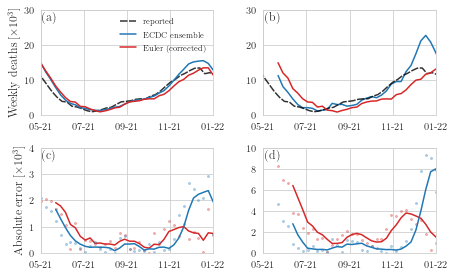

In [35]:
fig, ax = plt.subplots(nrows=2,ncols=2)
ax[0,0].text(dates_1wk[0]+datetime.timedelta(days=2), 0.9*30, r'(a)')
ax[0,0].plot(rate_of_change_dates_1wk, rate_of_change_1wk/div, ls = (0, (5, 1)), color = 'k', linewidth = 1.5, alpha = 0.8, label = r'reported')
#ax[0,0].fill_between(dates_1wk, data_quantile_0975_1wk/div, data_quantile_0025_1wk/div, facecolor = 'tab:blue', alpha = 0.3)
ax[0,0].plot(dates_1wk, data_point_1wk/div, color = 'tab:blue', linewidth = 1.5, label=r"ECDC ensemble")
ax[0,0].plot(euler_lagrange_1wk_dates,euler_lagrange_1wk_prediction/div, color = "tab:red", label=r"Euler (corrected)")
ax[0,0].set_xlim([datetime.date(2021, 5, 1), datetime.date(2022, 1, 1)])
ax[0,0].tick_params(axis='x', labelrotation=0)
ax[0,0].set_ylabel(r'Weekly deaths [$\times 10^3$]')
ax[0,0].xaxis.set_major_locator(MonthLocator([1,3,5,7,9,11]))
ax[0,0].xaxis.set_major_formatter(DateFormatter("%m-%y"))
ax[0,0].set_ylabel(r'Weekly deaths [$\times 10^3$]')
ax[0,0].set_ylim(0,30)
ax[0,0].legend(loc=1,frameon=False,fontsize=8)

ax[0,1].text(dates_1wk[0]+datetime.timedelta(days=2), 0.9*30, r'(b)')
#ax[0,1].fill_between(dates_4wk, data_quantile_0975_4wk/div, data_quantile_0025_4wk/div, facecolor = 'tab:blue', alpha = 0.3)
ax[0,1].plot(dates_4wk, data_point_4wk/div, color = 'tab:blue', linewidth = 1.5)
ax[0,1].plot(rate_of_change_dates_1wk, rate_of_change_1wk/div, ls = (0, (5, 1)), color = 'k', linewidth = 1.5, alpha = 0.8)
ax[0,1].plot(euler_lagrange_4wk_dates,euler_lagrange_4wk_prediction/div, color = "tab:red")
ax[0,1].set_xlim([datetime.date(2021, 5, 1), datetime.date(2022, 1, 1)])
ax[0,1].xaxis.set_major_locator(MonthLocator([1,3,5,7,9,11]))
ax[0,1].xaxis.set_major_formatter(DateFormatter("%m-%y"))
ax[0,1].set_ylim(0,30)

ax[1,0].text(dates_1wk[0]+datetime.timedelta(days=2), 0.9*4, r'(c)')
ax[1,0].plot(euler_lagrange_1wk_dates,euler_lagrange_1wk_error/div, color = 'tab:red', linewidth = 1.5, ls = "None", marker=".", markersize=4, alpha=0.3)   
ax[1,0].plot(euler_lagrange_1wk_dates,rolling_mean_1wk_euler_lagrange/div, color = 'tab:red', linewidth = 1.5)   
#ax[1,0].plot(rate_of_change_dates_1wk,error_euler_1wk_cum, color = 'tab:red', ls = (0, (5, 1)), linewidth = 1.5) 
ax[1,0].plot(euler_prediction_dates_1wk,error_ensemble_1wk, color = 'tab:blue', linewidth = 1.5, ls = "None", marker=".", markersize=4, alpha=0.3)  
ax[1,0].plot(euler_prediction_dates_1wk,rolling_mean_1wk_CDC, color = 'tab:blue', linewidth = 1.5)  
#ax[1,0].plot(rate_of_change_dates_1wk,error_ensemble_1wk_cum, color = 'tab:blue', ls = (0, (5, 1)), linewidth = 1.5)  
ax[1,0].set_xlim([datetime.date(2021, 5, 1), datetime.date(2022, 1, 1)])
ax[1,0].tick_params(axis='x', labelrotation=0)
ax[1,0].xaxis.set_major_locator(MonthLocator([1,3,5,7,9,11]))
ax[1,0].xaxis.set_major_formatter(DateFormatter("%m-%y"))
ax[1,0].set_ylabel(r'Absolute error [$\times 10^3$]')
ax[1,0].set_ylim(0,4)

ax[1,1].text(dates_1wk[0]+datetime.timedelta(days=2), 0.9*10, r'(d)')
ax[1,1].plot(euler_lagrange_4wk_dates,euler_lagrange_4wk_error/div, color = 'tab:red', linewidth = 1.5, ls = "None", marker=".", markersize=4, alpha=0.3)  
ax[1,1].plot(euler_lagrange_4wk_dates,rolling_mean_4wk_euler_lagrange/div, color = 'tab:red', linewidth = 1.5)  
#ax[1,1].plot(rate_of_change_dates_4wk,error_euler_4wk_cum, color = 'tab:red', ls = (0, (5, 1)), linewidth = 1.5) 
ax[1,1].plot(euler_prediction_dates_4wk,error_ensemble_4wk, color = 'tab:blue', linewidth = 1.5, ls = "None", marker=".", markersize=4, alpha=0.3)  
ax[1,1].plot(euler_prediction_dates_4wk,rolling_mean_4wk_CDC, color = 'tab:blue', linewidth = 1.5)  
#ax[1,1].plot(rate_of_change_dates_4wk,error_ensemble_4wk_cum, color = 'tab:blue', ls = (0, (5, 1)), linewidth = 1.5)  
ax[1,1].set_xlim([datetime.date(2021, 5, 1), datetime.date(2022, 1, 1)])
ax[1,1].tick_params(axis='x', labelrotation=0)
ax[1,1].xaxis.set_major_locator(MonthLocator([1,3,5,7,9,11]))
ax[1,1].xaxis.set_major_formatter(DateFormatter("%m-%y"))
ax[1,1].set_ylim(0,10)

plt.tight_layout()
plt.margins(0,0)
plt.savefig("euler_corrected_ecdc_comparison_fetched_Jan_2022_EU.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0.05)
plt.show()

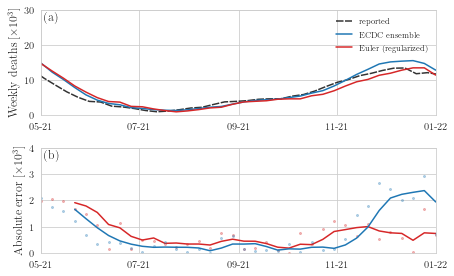

In [36]:
# only 1 week ahead 

fig, ax = plt.subplots(nrows=2,ncols=1)
ax[0].text(dates_1wk[0]+datetime.timedelta(days=2), 0.9*30, r'(a)')
ax[0].plot(rate_of_change_dates_1wk, rate_of_change_1wk/div, ls = (0, (5, 1)), color = 'k', linewidth = 1.5, alpha = 0.8, label = r'reported')
#ax[0,0].fill_between(dates_1wk, data_quantile_0975_1wk/div, data_quantile_0025_1wk/div, facecolor = 'tab:blue', alpha = 0.3)
ax[0].plot(dates_1wk, data_point_1wk/div, color = 'tab:blue', linewidth = 1.5, label=r"ECDC ensemble")
ax[0].plot(euler_lagrange_1wk_dates,euler_lagrange_1wk_prediction/div, color = "tab:red", label=r"Euler (regularized)")
ax[0].set_xlim([datetime.date(2021, 5, 1), datetime.date(2022, 1, 1)])
ax[0].tick_params(axis='x', labelrotation=0)
ax[0].set_ylabel(r'Weekly deaths [$\times 10^3$]')
ax[0].xaxis.set_major_locator(MonthLocator([1,3,5,7,9,11]))
ax[0].xaxis.set_major_formatter(DateFormatter("%m-%y"))
ax[0].set_ylabel(r'Weekly deaths [$\times 10^3$]')
ax[0].set_ylim(0,30)
ax[0].legend(loc=1,frameon=False,fontsize=8)



ax[1].text(dates_1wk[0]+datetime.timedelta(days=2), 0.9*4, r'(b)')
ax[1].plot(euler_lagrange_1wk_dates,euler_lagrange_1wk_error/div, color = 'tab:red', linewidth = 1.5, ls = "None", marker=".", markersize=4, alpha=0.3)   
ax[1].plot(euler_lagrange_1wk_dates,rolling_mean_1wk_euler_lagrange/div, color = 'tab:red', linewidth = 1.5)   
#ax[1,0].plot(rate_of_change_dates_1wk,error_euler_1wk_cum, color = 'tab:red', ls = (0, (5, 1)), linewidth = 1.5) 
ax[1].plot(euler_prediction_dates_1wk,error_ensemble_1wk, color = 'tab:blue', linewidth = 1.5, ls = "None", marker=".", markersize=4, alpha=0.3)  
ax[1].plot(euler_prediction_dates_1wk,rolling_mean_1wk_CDC, color = 'tab:blue', linewidth = 1.5)  
#ax[1,0].plot(rate_of_change_dates_1wk,error_ensemble_1wk_cum, color = 'tab:blue', ls = (0, (5, 1)), linewidth = 1.5)  
ax[1].set_xlim([datetime.date(2021, 5, 1), datetime.date(2022, 1, 1)])
ax[1].tick_params(axis='x', labelrotation=0)
ax[1].xaxis.set_major_locator(MonthLocator([1,3,5,7,9,11]))
ax[1].xaxis.set_major_formatter(DateFormatter("%m-%y"))
ax[1].set_ylabel(r'Absolute error [$\times 10^3$]')
ax[1].set_ylim(0,4)

plt.tight_layout()
plt.margins(0,0)
plt.savefig("euler_corrected_ecdc_comparison_fetched_Jan_2022_EU_1week.png", dpi = 600, bbox_inches = 'tight', pad_inches = 0.05)
plt.show()